# Analyzing Survey Data

Create graphs and descriptive statistics. Perform hypothesis tests. Analyze qualitative and quantative data.Example code from DrStephPowers shows feedback from students on gamifying a first year class of 80 students.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [9]:
econdat = pd.read_csv('Data/econgamified.csv', sep=",")

In [10]:
econdat

,Respondent Id,Q1,Q2,Q3,Q4,Q5,Q6,Q8A,Q8B,Q8C,...,Q28D,Q28E,Q28F,Q28G,Q28H,Q28I,Q28J,Q29,Q30,Q31
0,1,2.0,5.0,3.0,5.0,2.0,5.0,2.0,3.0,4.0,...,3.0,3.0,5.0,5.0,5.0,3.0,3.0,2.0,3.0,1.0
1,2,0.0,4.0,4.0,5.0,2.0,4.0,1.0,NaN,NaN,...,4.0,5.0,5.0,5.0,3.0,4.0,5.0,2.0,2.0,1.0
2,3,1.0,3.0,3.0,2.0,-1.0,3.0,1.0,2.0,2.0,...,3.0,2.0,3.0,4.0,2.0,4.0,3.0,2.0,3.0,1.0
3,4,2.0,3.0,3.0,5.0,2.0,5.0,1.0,2.0,3.0,...,5.0,5.0,4.0,4.0,4.0,3.0,3.0,2.0,1.0,2.0
4,5,2.0,5.0,5.0,5.0,2.0,4.0,2.0,1.0,3.0,...,3.0,5.0,5.0,5.0,1.0,3.0,4.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,101,2.0,5.0,5.0,5.0,2.0,4.0,1.0,4.0,2.0,...,3.0,3.0,4.0,5.0,5.0,2.0,4.0,2.0,2.0,2.0
101,102,0.0,3.0,3.0,1.0,-1.0,2.0,1.0,2.0,3.0,...,2.0,4.0,4.0,4.0,4.0,4.0,3.0,2.0,NaN,3.0
102,103,1.0,4.0,4.0,2.0,-2.0,2.0,1.0,2.0,5.0,...,5.0,5.0,5.0,4.0,2.0,4.0,5.0,2.0,1.0,1.0
103,104,2.0,5.0,5.0,5.0,2.0,5.0,1.0,2.0,3.0,...,5.0,5.0,5.0,5.0,4.0,5.0,5.0,1.0,1.0,1.0


## Demographics

Q3: What is your age?

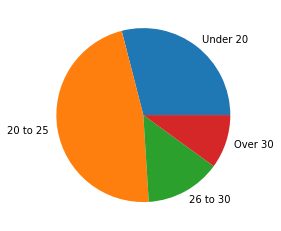

In [11]:
labels1="Under 20","20 to 25", "26 to 30", "Over 30"
econdat.Q31.value_counts(sort=False).plot.pie(labels=labels1)
plt.ylabel('')
plt.show()

Q29: What program are you currently enrolled in?

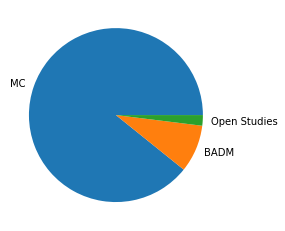

In [12]:
labels1="MC","BADM", "Open Studies", "Other" #write the rest of the code for Q29


## Opinions

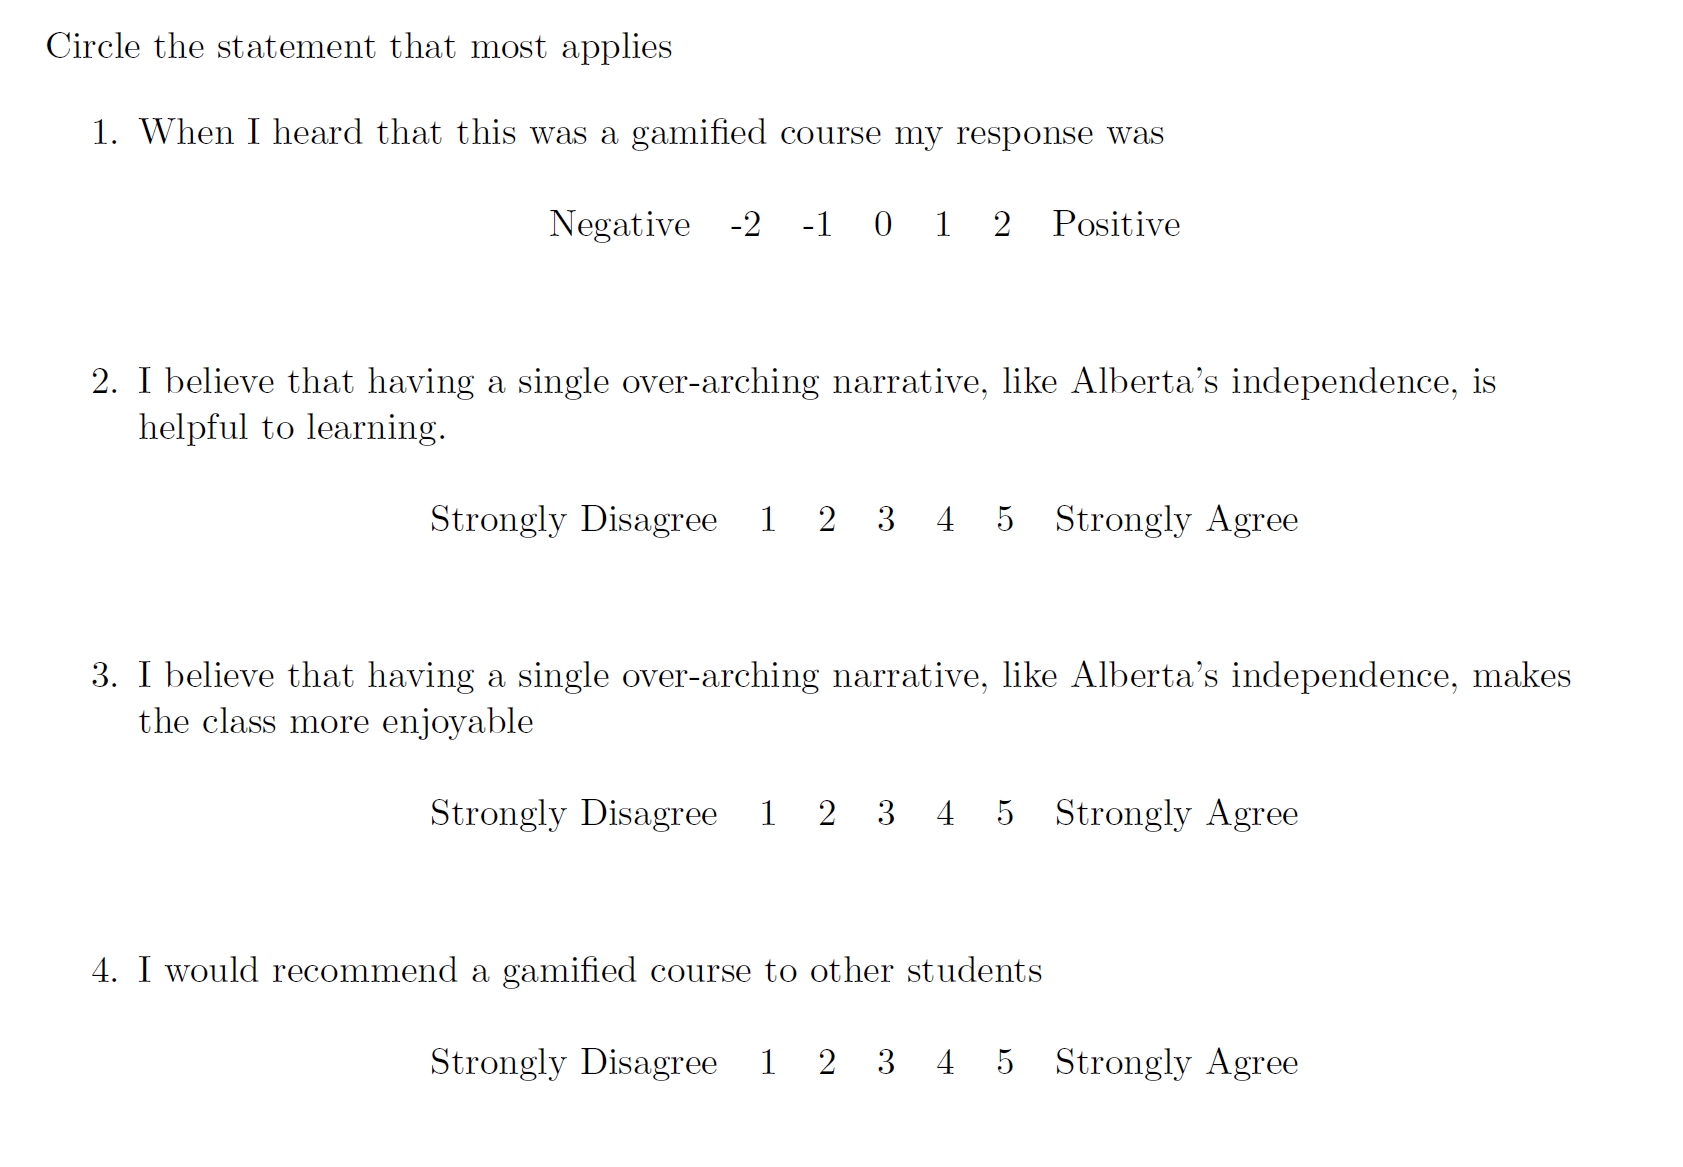

Q1: When I heard that this was a gamified course my response was...

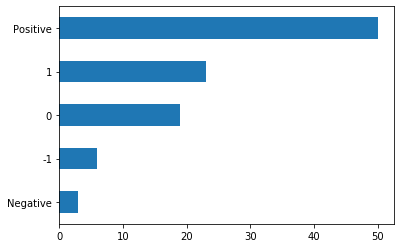

In [22]:
labels1="Negative", "-1", "0", "1", "Positive"
econdat['Q1'].value_counts().sort_index().plot(kind="barh")
plt.yticks(np.arange(5), labels1)
plt.show()

Q2: I believe that having a single overarching narrative, like Alberta's independence, is helpful to learning:

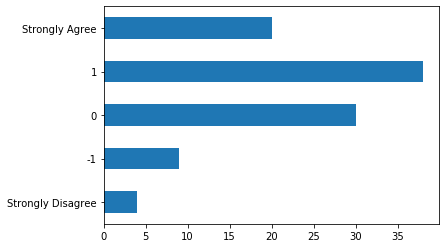

In [23]:
labels1="Strongly Disagree", "-1", "0", "1", "Strongly Agree" #write the rest of the code for Q2


## Hypothesis Tests

Spearman Rank Correlation - Is there a relationship between two likert scale questions

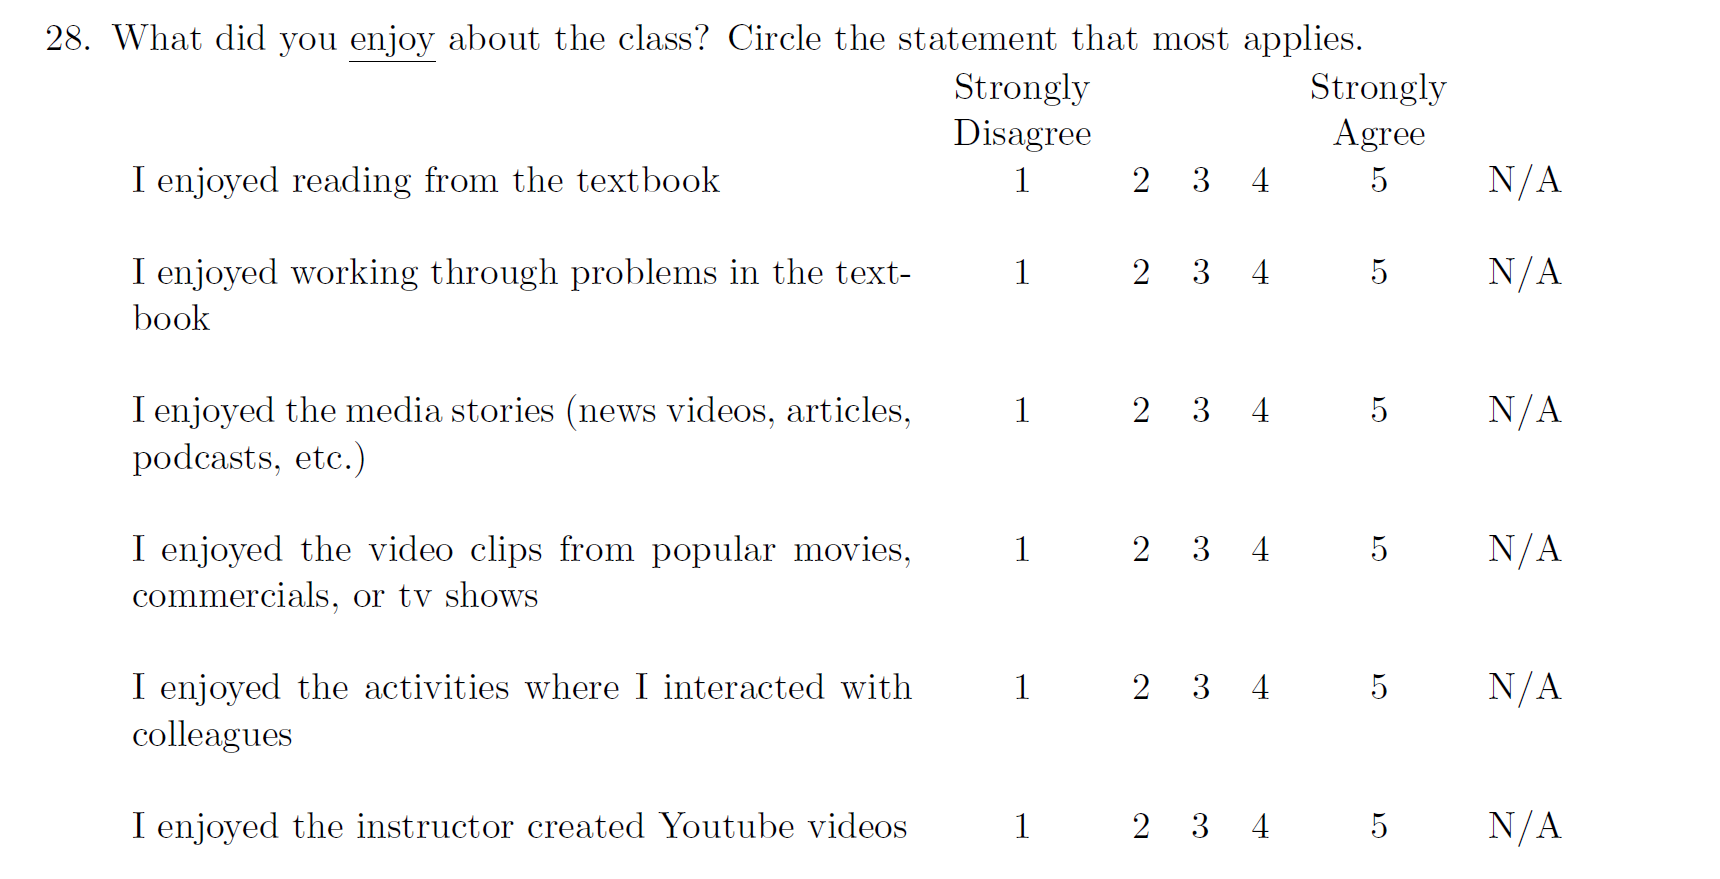

### Is there a correlation (relationship) in the responses to question Q28A: Textbook and Q28B: Textbook Problems

In other words, do students who enjoy reading from the textbook also enjoy the problems from the textbook?

$$H_O:r_s=0$$  $$H_A:r_s≠0$$

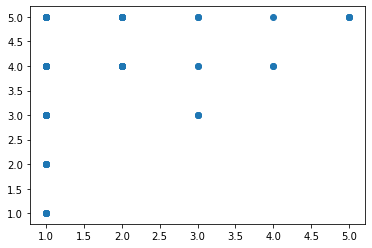

In [111]:
from matplotlib import pyplot
pyplot.scatter(econdat.Q28A, econdat.Q28F)
pyplot.show()

In [113]:
from scipy.stats import spearmanr
econdat.fillna(" ")
corr, p_value = spearmanr(econdat.Q28A,econdat.Q28B, nan_policy="omit")

print(corr)
print(p_value)

0.8044102389542295
5.238013265381012e-20


### Is there a correlation (relationship) in the responses to question Q28C: Media and Q28D: Videos 

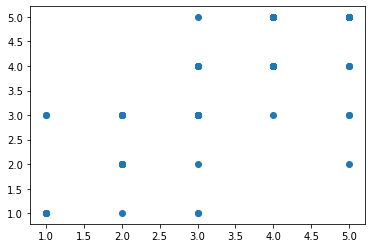

In [115]:
#plot Q28C and 28D


In [116]:
#determine the correlation coefficient and p-value


0.797313881033089
5.414410416603578e-23


### Do Certificate and Diploma students enjoy the textbook the same?

Need to only look at Certificate (Q29=1) and Diploma (Q29=2) students.

$H_O:$ Distribution is equal (similar ranking)
$H_A:$ Distribution is not equal (different ranking)

$$z=\frac{{U-m}_u}{\sigma_u}$$

In [121]:
econdat2 = econdat[(econdat.Q29==1) | (econdat.Q29==2)]

In [125]:
from scipy.stats import mannwhitneyu
corr, p_value = mannwhitneyu(econdat2.Q28A,econdat2.Q29)

print(corr)
print(p_value)

4256.0
0.022502682117724992


### Do Certificate and Diploma students enjoy instructor youtube videos the same

Econdat2 already includes just Certificate (Q29=1) and Diploma (Q29=2) students. Perform a Mann Whitney test with Q29F.


In [126]:
#perform a Mann Whitney with Q29F

937.0
7.747081584600412e-27


## Wordclouds

In [180]:
!pip -q install wordcloud
import warnings
warnings.filterwarnings('ignore')

#loading all necessary libraries
import numpy as np
import pandas as pd

import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [181]:
econopen = pd.read_csv('Data/gamif_shortansw.csv', sep=",")

In [182]:
econopen.head()

,Respondent Id,Q7,Q10,Q12,Q15,Q16,Extra remarks
0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Not really,"Good, I like how we have in-class activities",Don't really like the challenges,Less assignments to better help control,No,NaN


In [183]:
econopen.fillna(" ") # remove NAN

,Respondent Id,Q7,Q10,Q12,Q15,Q16,Extra remarks
0,1,,,,,,
1,2,,,,,,
2,3,,,,,,
3,4,,,,,,
4,5,Not really,"Good, I like how we have in-class activities",Don't really like the challenges,Less assignments to better help control,No,
...,...,...,...,...,...,...,...
211,212,,,,,,
212,213,,,,,,
213,214,,,,,,
214,215,,,,,,


### Create a WordCloud showing the response to Q10: Comments about the use of Class Time in a Gamified Course

In [201]:
econopen['Q10']= econopen['Q10'].str.lower() # make all lower case
Q10_open = econopen['Q10'].str.split(' ') # split up comments into words
Q10_open = Q10_open.dropna() # remove the empty cells
Q10_open.head() 

4                                                                                        [good,, i, like, how, we, have, in-class, activities]
5                                                                                                                    [it, was, properly, done]
22                                                                                                                             [it, was, good]
23    [sometimes, lectures, were, too, hard, to, follow, and, couldn't, gather, all, the, information, needed, for, curates, and, assignments]
25                                                                          [everything, feels, too, rushed, i, do, not, retain, enough, info]
Name: Q10, dtype: object

In [202]:
Q10_open=pd.DataFrame(Q10_open) # convert to dataframe
Q10_open

,Q10
4,"[good,, i, like, how, we, have, in-class, activities]"
5,"[it, was, properly, done]"
22,"[it, was, good]"
23,"[sometimes, lectures, were, too, hard, to, follow, and, couldn't, gather, all, the, information, needed, for, curates, and, assignments]"
25,"[everything, feels, too, rushed, i, do, not, retain, enough, info]"
27,"[some, games, were, distracting, and, confusing]"
44,"[curate, sheets, help, keep, the, focus, on, the, information]"
48,"[too, much, work, towards, the, end]"
50,"[the, monopoly, game, and, shopping, games, were, a, complete, waste, of, time., the, class, size, is, too, big, for, activities, like, these, to, take, placce]"
52,"[more, time, working, on, assignments]"


In [205]:
Q10_open_cleaned = []

for Q10 in Q10_open:
    Q10 = [x.strip(string.punctuation) for x in Q10] #remove punctuation
    Q10_open.append(Q10)

Q10_open_cleaned[0]

Q10_text = [" ".join(Q10) for Q10 in Q10_open_cleaned]  #merge into single set of text
final_text_Q10 = " ".join(Q10_text)
final_text_Q10[:500]

stopwords = set(STOPWORDS)   #remove unimportant words
stopwords.update(["subject","re"])

wordcloud_Q10 = WordCloud(stopwords=stopwords, background_color="white", max_font_size=50, max_words=100).generate(final_text_Q10)

# Lines 2 - 5
plt.figure(figsize = (20,20))
plt.imshow(wordcloud_Q10, interpolation='bilinear')
plt.axis("off")
plt.show()

IndexError: list index out of range

In [206]:
Q10_text

['good i like how we have in-class activities',
 'it was properly done',
 'it was good',
 "sometimes lectures were too hard to follow and couldn't gather all the information needed for curates and assignments",
 'everything feels too rushed i do not retain enough info',
 'some games were distracting and confusing',
 'curate sheets help keep the focus on the information',
 'too much work towards the end',
 'the monopoly game and shopping games were a complete waste of time the class size is too big for activities like these to take placce',
 'more time working on assignments',
 'less pressure than other methods of delivery and testing',
 'i think it was a bit unorganized and the end was very rushed',
 'good  ',
 'having class activities makes it a little easier to apply the learning to real life scenarios',
 'no',
 'i like the lectures',
 'enjoy the style of course but the end seems rushed to gain xp',
 "i really dislike all the demonstrations i find they are a waste of time and i don't

### Create a WordCloud showing the response to Q12: Comments about assessments in a Gamified Course

In [189]:
# Create WordCloud for Q12. Hint, replace Q10 with Q12 in the code.
econopen['Q12']= econopen['Q12'].str.lower() # make all lower case
Q12_open = econopen['Q12'].str.split(' ') # split up comments into words
Q12_open = Q12_open.dropna() # remove the empty cells
Q12_open.head() 

4                                                                                                    [don't, really, like, the, challenges]
12                                                                                    [love, how, there, are, mini, tests, and, not, exams]
17                                                                                        [great, for, individuals, who, don't, test, well]
23    [quizzes, seemed, to, be, nothing, similar, to, what, we, learned, in, the, course., i, didn't, do, great, on, any, of, the, quizzes]
25                   [i, don't, have, correct, notes, to, do, them,, i, need, to, take, my, own, notes, not, curate, fill, in, the, blanks]
Name: Q12, dtype: object

In [190]:
Q12_open=pd.DataFrame(Q12_open) # convert to dataframe
Q12_open

,Q12
4,"[don't, really, like, the, challenges]"
12,"[love, how, there, are, mini, tests, and, not, exams]"
17,"[great, for, individuals, who, don't, test, well]"
23,"[quizzes, seemed, to, be, nothing, similar, to, what, we, learned, in, the, course., i, didn't, do, great, on, any, of, the, quizzes]"
25,"[i, don't, have, correct, notes, to, do, them,, i, need, to, take, my, own, notes, not, curate, fill, in, the, blanks]"
27,"[too, many, small, assignments, spread, out, in, various, levels, it, was, hard, to, track., i, always, felt, behind]"
31,"[i, didn't, entirely, like, the, no, exams,, i, use, them, to, benchmark, my, progress.]"
44,"[like, the, variety, of, the, challenges, enjoy, that, they, all, aren't, essays., enjoy, the, open, book, quizzes., the, mix, of, optional, group, work, and, individual, assignments]"
48,"[i, like, the, assignment, style]"
50,"[too, much, inconsitency, in, marking, and, it, took, too, long, to, get, our, grades, back]"


In [192]:
Q12_open_cleaned = []

for Q12 in Q12_open:
    Q12 = [x.strip(string.punctuation) for x in Q12] #remove punctuation
    Q12_open.append(Q12)

Q12_open_cleaned[0]

Q12_text = [" ".join(Q12) for Q12 in Q12_open_cleaned]  #merge into single set of text
final_text_Q12 = " ".join(Q12_text)
final_text_Q12[:500]

stopwords = set(STOPWORDS)   #remove unimportant words
stopwords.update(["subject","re"])

wordcloud_Q12 = WordCloud(stopwords=stopwords, background_color="white", max_font_size=50, max_words=100).generate(final_text_Q12)

# Lines 2 - 5
plt.figure(figsize = (20,20))
plt.imshow(wordcloud_Q12, interpolation='bilinear')
plt.axis("off")
plt.show()

IndexError: list index out of range